In [60]:
import pandas as pd 
import numpy as np
import seaborn as sn

In [61]:
df=pd.read_csv('clean_csv.csv')

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

1 column's data types

In [63]:
df['peak-rpm'].dtypes

dtype('float64')

correlation

In [64]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


Continuous Numerical Variables:
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

postive linear relationship

scatter plot of engine-size and price

(0.0, 53291.529737018456)

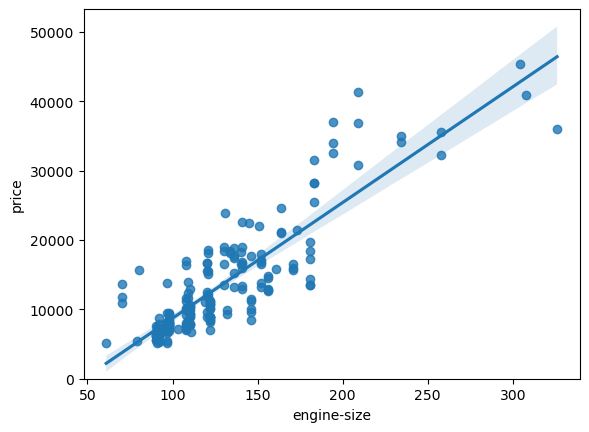

In [65]:
# engine-size as potential predictor variable of price
sn.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [66]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

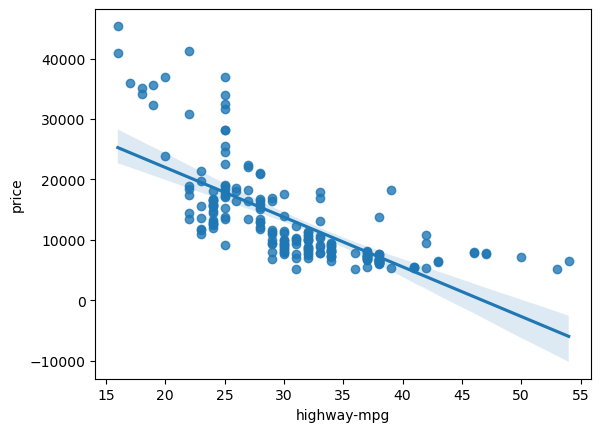

In [67]:
sn.regplot(x='highway-mpg',y='price',data=df)

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [68]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


there is negative relationship between highway-mpg and price which aroun -70.05

Weak linear Relatioship

<Axes: xlabel='peak-rpm', ylabel='price'>

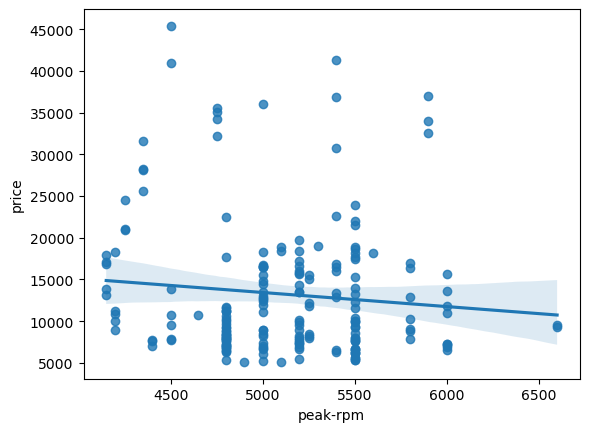

In [69]:
sn.regplot(x='peak-rpm',y='price',data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

In [70]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


correlation between stroke and price

<Axes: xlabel='stroke', ylabel='price'>

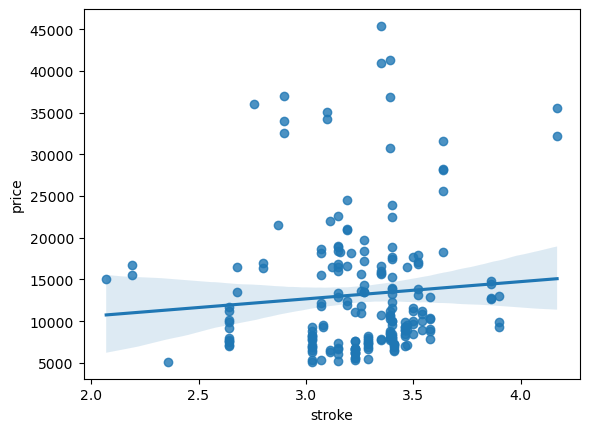

In [71]:
sn.regplot(x='stroke',y='price',data=df)

In [72]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


there is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

# Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

the reltionship between body-style and price


<Axes: xlabel='body-style', ylabel='price'>

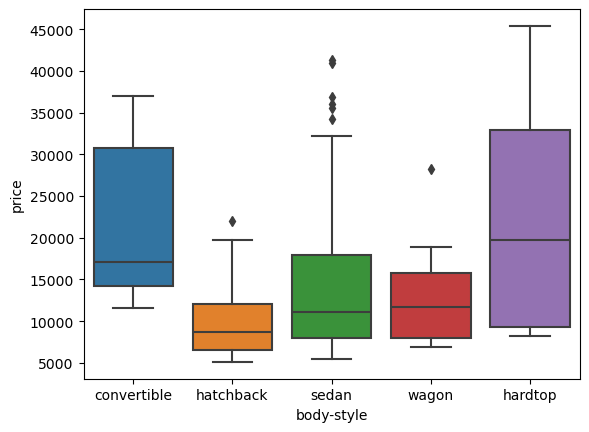

In [73]:
sn.boxplot(x='body-style',y='price',data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price

<Axes: xlabel='engine-location', ylabel='price'>

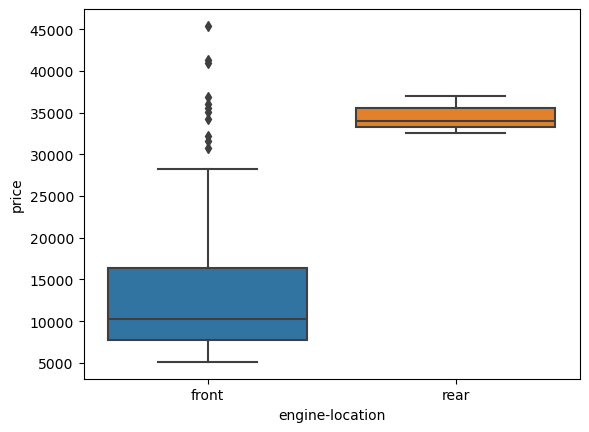

In [74]:
sn.boxplot(x="engine-location", y="price", data=df)

we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

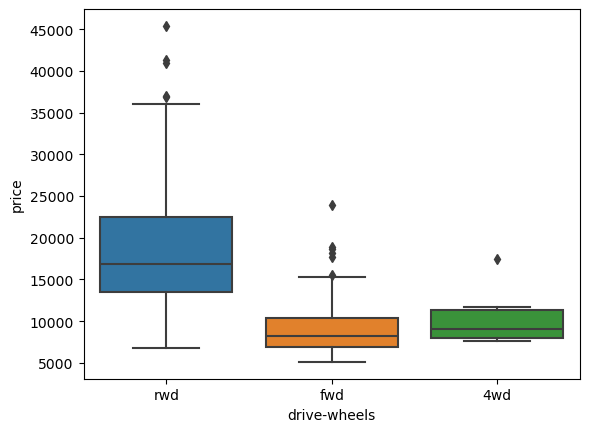

In [75]:
# drive-wheels
sn.boxplot(x="drive-wheels", y="price", data=df)

we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

Descriptive analysis

In [76]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,199.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,102.900498,0.840796,122.00000,98.797015,0.837102,0.915126,0.837102,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957
std,58.167861,59.234956,1.254802,31.99625,6.066366,0.059213,0.029187,0.059213,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,480.521824,6.423220,6.815150,7947.066342,2.534599,1.840739
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.678039,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,50.000000,53.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.801538,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,100.000000,103.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.832292,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,150.000000,154.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.881788,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,200.000000,204.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [77]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,165,115,94,118,198,145,157,92,153


Value Counts
Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [79]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [84]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [129]:
df_group_one=df[['drive-wheels','body-style','price']]

In [159]:
df.groupby('drive-wheels')['price'].mean().to_frame()
# df['drive-wheels']

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [110]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [106]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [108]:
df_gpteset_1=df[['body-style','price']]
grouped_body_style=df_gpteset_1.groupby(['body-style'],as_index=False).mean()
grouped_body_style

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/08/cp1l0z413bd2pv6_3bcn7g340000gn/T/ipykernel_4044/2346994808.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


<function matplotlib.pyplot.show(close=None, block=None)>

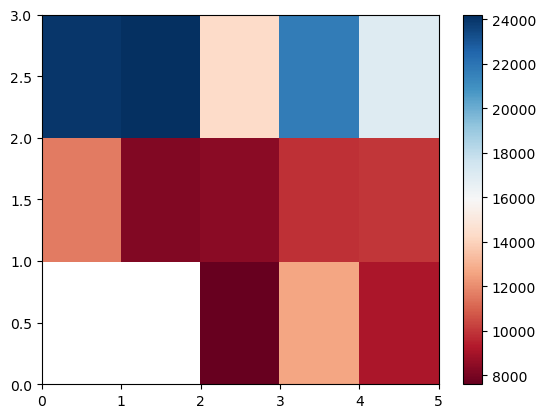

In [114]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.show

updated chart

/var/folders/08/cp1l0z413bd2pv6_3bcn7g340000gn/T/ipykernel_4044/3671695375.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


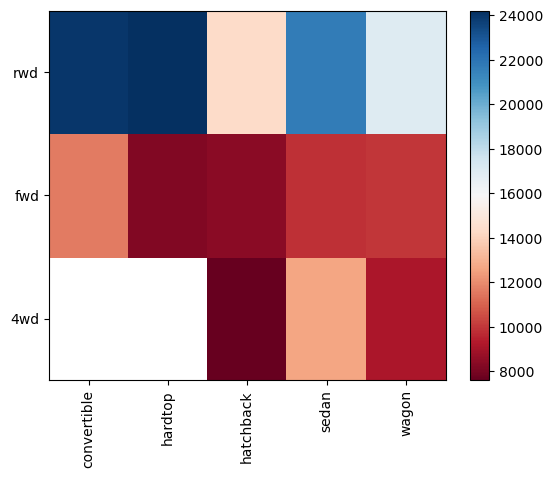

In [116]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# correlation and causation
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.

P-value

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is 
 0.001: we say there is strong evidence that the correlation is significant.
the p-value is 
 0.05: there is moderate evidence that the correlation is significant.
the p-value is 
 0.1: there is weak evidence that the correlation is significant.
the p-value is 
 0.1: there is no evidence that the correlation is significant.

In [137]:
from scipy import stats

In [142]:
pearson_correlation,pvalue=stats.pearsonr(df['city-mpg'],df['price'])
print('the pearson correlation coefficient is ',pearson_correlation,'with pvalue of p=',pvalue)

the pearson correlation coefficient is  -0.6865710067844677 with pvalue of p= 2.3211320655676474e-29


Conclusion:
Since the p-value is 
 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [144]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Conclusion:
Since the p-value is 
 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

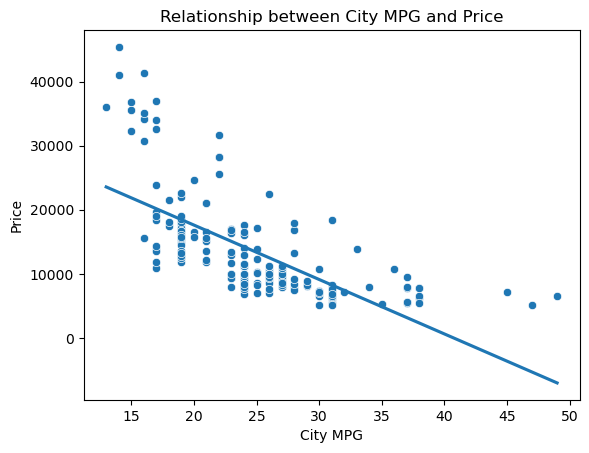

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create scatter plot with seaborn
sns.scatterplot(x='city-mpg', y='price', data=df)

# Add a trend line (linear regression)
sns.regplot(x='city-mpg', y='price', data=df, scatter=False, ci=None)

# Customize plot (optional)
plt.xlabel("City MPG")
plt.ylabel("Price")
plt.title("Relationship between City MPG and Price")

# Display the plot
plt.show()

# another way charting scatter plot

Text(0.5, 1.0, 'Realtionship between city mpg and price')

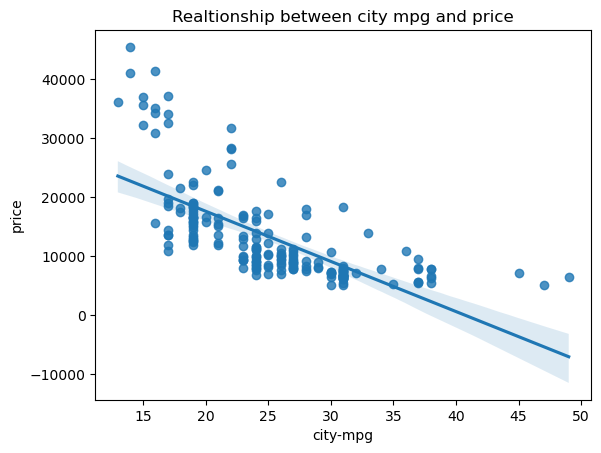

In [158]:
sns.regplot(x='city-mpg',y='price',data=df)
plt.xlabel('city-mpg')
plt.ylabel('price')
plt.title('Realtionship between city mpg and price')